In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.models as models
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image

#이미지 표시 kernel dead : https://normal-engineer.tistory.com/236

In [2]:
model = models.resnet18(pretrained=False)

C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\noname\anaconda3\envs\sjh\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

file_path = "C:\\Users\\noname\\Desktop\\Casting\\casting_data\\train"

In [4]:
data = dset.ImageFolder(root=file_path,transform=transform)
train_loader = torch.utils.data.DataLoader(data, batch_size=32,shuffle=True,num_workers=2)

In [4]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [85]:
# function to calculate number of correct labels
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

# use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# initialize network
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)
print('Finished Training')

epoch 0 total_correct: 6155 loss: 57.40950394794345
epoch 1 total_correct: 6380 loss: 24.324382128659636
epoch 2 total_correct: 6419 loss: 17.86076728696935
epoch 3 total_correct: 6503 loss: 14.181129330769181
epoch 4 total_correct: 6491 loss: 12.842442910652608
epoch 5 total_correct: 6538 loss: 9.744332362140995
epoch 6 total_correct: 6558 loss: 8.102313987037633
epoch 7 total_correct: 6555 loss: 6.79260600010457
epoch 8 total_correct: 6553 loss: 7.375359688303433
epoch 9 total_correct: 6575 loss: 6.131709970344673
epoch 10 total_correct: 6565 loss: 8.476494978982373
epoch 11 total_correct: 6552 loss: 8.419343070374453
epoch 12 total_correct: 6587 loss: 4.959134064825776
epoch 13 total_correct: 6567 loss: 5.669968496687943
epoch 14 total_correct: 6589 loss: 4.2433299113981775
epoch 15 total_correct: 6591 loss: 4.263523001503927
epoch 16 total_correct: 6585 loss: 4.76631441794234
epoch 17 total_correct: 6599 loss: 3.3369783263115096
epoch 18 total_correct: 6579 loss: 6.14663295027276
e

In [86]:
from collections import defaultdict

# 클래스별 예측 수를 저장할 딕셔너리 생성
class_prediction_counts = defaultdict(int)
# 클래스별 이미지 개수를 저장할 딕셔너리 생성
class_label_counts = defaultdict(int)

# 예측 수행 및 클래스별 예측 수 계산
total_correct = 0
total_images = 0

with torch.no_grad():
    for images, labels in data_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # 예측 수행
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # 클래스별 예측 수 계산
        for pred in predicted:
            class_prediction_counts[pred.item()] += 1
        
        # 클래스별 이미지 개수 계산
        for label in labels:
            class_label_counts[label.item()] += 1
            
        # 정확도 계산
        total_correct += (predicted == labels).sum().item()
        total_images += labels.size(0)

# 전체 정확도 계산
accuracy = total_correct / total_images

# 클래스별 정확도 계산 및 출력
for class_id, count in class_label_counts.items():
    class_name = classes[class_id]
    predicted_count = class_prediction_counts[class_id]
    class_accuracy = predicted_count / count if count != 0 else 0
    print(f"Class: {class_name}, Predicted count: {predicted_count}, Original count: {count}, Class Accuracy: {class_accuracy}")

# 전체 정확도 출력
print("Overall Accuracy:", accuracy)

Class: Def, Predicted count: 3766, Original count: 3758, Class Accuracy: 1.0021287919105908
Class: Ok, Predicted count: 2867, Original count: 2875, Class Accuracy: 0.9972173913043478
Overall Accuracy: 0.9981908638625057


In [93]:
PATH = "C:\\Users\\noname\\Desktop\\Casting_NEW2.pth"
torch.save(model.state_dict(), PATH)

In [5]:
PATH = "C:\\Users\\noname\\Desktop\\Casting\\Casting_NEW.pth"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [6]:
test_path = "C:\\Users\\noname\\Desktop\\Casting\\casting_data\\test"
test = dset.ImageFolder(root=test_path,transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=32,shuffle=False,num_workers=2)

In [7]:
classes = ("Def","Ok")

num_classes = len(classes)
for i,c in enumerate(classes):
  print("classes[%d] : %s"%(i, c))
print("Number of classes : %d"%(num_classes))

classes[0] : Def
classes[1] : Ok
Number of classes : 2


Number of incorrectly classified images: 2
Accuracy: 0.9972027972027973
Accuracy of Def : 452/453
Accuracy of Ok : 261/262


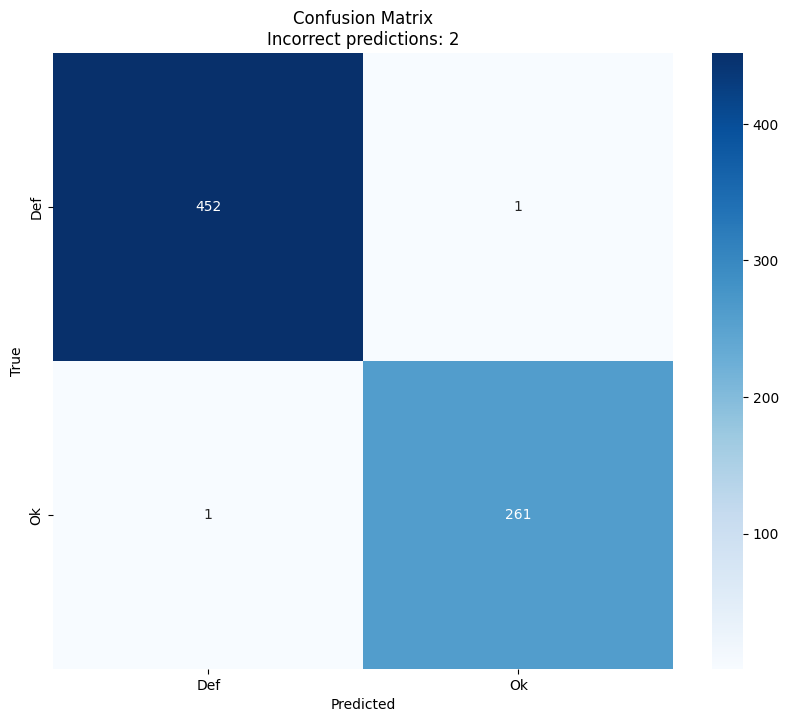

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 재현 가능한 결과를 위해 랜덤 시드 설정
torch.manual_seed(42)
np.random.seed(42)

# 변수 초기화
num_correct = 0
num_total = 0
num_incorrect = 0

# 클래스별 정답 개수 및 맞춘 개수를 저장할 리스트 초기화
class_correct = [0] * num_classes
class_total = [0] * num_classes

# 실제 클래스와 예측된 클래스를 저장할 리스트 초기화
true_classes = []
predicted_classes = []

# 예측 수행
with torch.no_grad():
    model.eval()
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # 모델 예측
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # 정확도 및 잘못 분류된 이미지 개수 계산
        num_correct += torch.sum(predicted == labels).item()
        num_total += labels.size(0)
        num_incorrect += torch.sum(predicted != labels).item()

        # 클래스별 정답 개수 및 맞춘 개수 계산
        for i in range(len(predicted)):
            label = labels[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1
            
        # 실제 클래스와 예측된 클래스 저장
        true_classes.extend(labels.cpu().numpy())
        predicted_classes.extend(predicted.cpu().numpy())

# 정확도 계산
accuracy = num_correct / num_total

# 결과 출력
if num_incorrect == 0:
    print("No incorrectly classified images")
else:
    print("Number of incorrectly classified images:", num_incorrect)

print("Accuracy:", accuracy)

# 클래스별 정답 개수 및 맞춘 개수 출력
for i in range(num_classes):
    print('Accuracy of %s : %d/%d' % (classes[i], class_correct[i], class_total[i]))

# Confusion Matrix 생성
cm = confusion_matrix(true_classes, predicted_classes)

# 클래스 이름 설정
class_names = classes

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix\nIncorrect predictions: {}'.format(num_incorrect))  # 잘못 예측한 이미지 수 포함
plt.show()

In [9]:
CAM_images = []
# true_classes와 predicted_classes에서 라벨 값이 1로 같은 이미지의 인덱스 찾기
same_label_indices = [i for i, (true_label, predicted_label) in enumerate(zip(true_classes, predicted_classes)) if true_label == 0 and predicted_label == 0]

# same_label_indices에 해당하는 이미지를 전부 불러와서 CAM_images에 저장
for idx in same_label_indices:
    image, _ = test_loader.dataset[idx]
    file_path = test_loader.dataset.imgs[idx][0]  # 파일 경로는 test_loader.dataset.imgs에 저장되어 있음
    CAM_images.append((image, file_path))

# CAM_images 리스트에 저장된 이미지의 개수 출력
print("Number of images in CAM_images:", len(CAM_images))

Number of images in CAM_images: 452


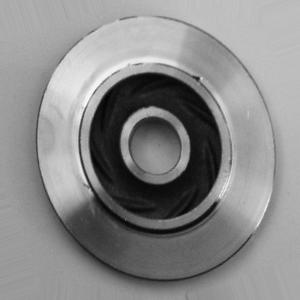

In [31]:
img_pil

Selected image path: C:\Users\noname\Desktop\Casting\casting_data\test\def_front\cast_def_0_1063.jpeg


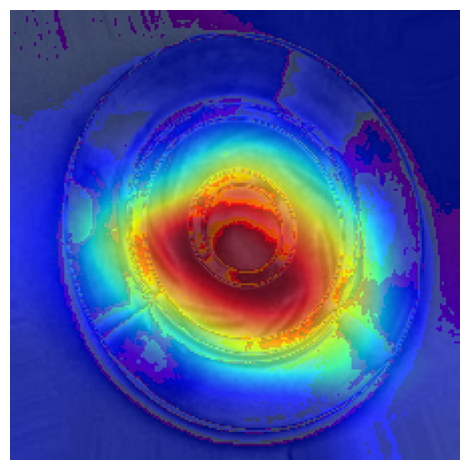

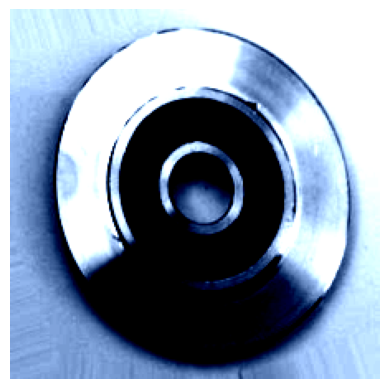

In [29]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import GradCAMpp
from PIL import Image

n=1

# Get your input
img = CAM_images[n][0]

#get image path
selected_image_path = CAM_images[n][1]
print("Selected image path:", selected_image_path)

img_pil = Image.open(selected_image_path)

# Preprocess it for your chosen model
input_tensor = transform(img_pil)
input = input_tensor.unsqueeze(0)
input = input.to(device)  # input_tensor를 GPU로 이동
#with torch.no_grad():
    #out = model(input_tensor.unsqueeze(0).to(device))

                         
with GradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input)
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

#Kernel Dead 방지 코드
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#CAM을 원본 이미지에 덮어씌우기
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.3)
#CAM 히트맵 출력
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

#원본 이미지 출력
plt.imshow(img.permute(1, 2, 0))  # 이미지를 RGB 형식으로 변환하여 출력
plt.axis('off')
plt.show()

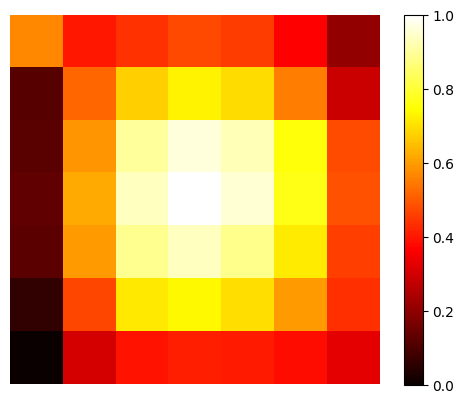

[tensor([[[0.5685, 0.3991, 0.4380, 0.4737, 0.4563, 0.3640, 0.2036],
          [0.1143, 0.5172, 0.6745, 0.7285, 0.6941, 0.5532, 0.2876],
          [0.1196, 0.5896, 0.8998, 0.9648, 0.9268, 0.7557, 0.4771],
          [0.1314, 0.6193, 0.9369, 1.0000, 0.9544, 0.7676, 0.4879],
          [0.1212, 0.5949, 0.8882, 0.9340, 0.8849, 0.7156, 0.4589],
          [0.0616, 0.4710, 0.7130, 0.7376, 0.6978, 0.5968, 0.4349],
          [0.0000, 0.3008, 0.3919, 0.4113, 0.4044, 0.3844, 0.3247]]],
        device='cuda:0')]

In [157]:
#CAM 히트맵과 수치값 확인

plt.imshow(activation_map[0].squeeze(0).cpu().detach().numpy(), cmap='hot', interpolation='nearest')
plt.axis('off')
plt.colorbar()
plt.show()

activation_map

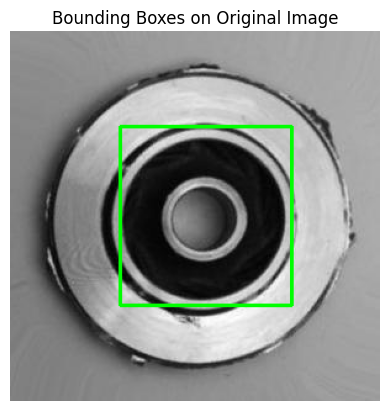

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision.transforms.functional import to_pil_image
from PIL import ImageDraw

# 이미지 파일을 읽어옵니다.
img3 = cv2.imread(selected_image_path)

# CAM의 히트맵 사이즈를 이미지와 같게 조정
cam_resized = cv2.resize(activation_map[0].squeeze(0).cpu().detach().numpy(), (img3.shape[1], img3.shape[0]))

# 임계값 이상을 가진 영역만 활성화하여 binary_map에 할당
threshold = 0.8  # you may need to adjust this threshold based on your activation map
binary_map = cam_resized > threshold

# binary map의 contour 찾기
contours, _ = cv2.findContours(np.uint8(binary_map), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지에 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color, thickness: 2

# 바운딩 박스가 그려진 이미지 출력
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes on Original Image')
plt.axis('off')
plt.show()

In [104]:
Normal_images = []
# true_classes와 predicted_classes에서 라벨 값이 0로 같은 이미지의 인덱스 찾기
same_label_indices2 = [i for i, (true_label, predicted_label) in enumerate(zip(true_classes, predicted_classes)) if true_label == 1 and predicted_label == 1]

# same_label_indices에 해당하는 이미지를 전부 불러와서 CAM_images에 저장
for idx in same_label_indices2:
    image, _ = test_loader.dataset[idx]
    file_path = test_loader.dataset.imgs[idx][0]  # 파일 경로는 test_loader.dataset.imgs에 저장되어 있음
    Normal_images.append((image, file_path))

# CAM_images 리스트에 저장된 이미지의 개수 출력
print("Number of images in Noraml_images:", len(Normal_images))

Number of images in Noraml_images: 261


In [110]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp

n=177

# Get your input
img_norm = Normal_images[n][0]

#get image path
selected_image_path2 = Normal_images[n][1]

print("Selected image path:", selected_image_path2)

# Preprocess it for your chosen model
input_tensor = normalize(resize(img_norm, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
input_tensor = input_tensor.to(device)  # input_tensor를 GPU로 이동
with torch.no_grad():
    out = model(input_tensor.unsqueeze(0).to(device))

                         
with SmoothGradCAMpp(model) as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(input_tensor.unsqueeze(0))
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

Selected image path: C:\Users\noname\Desktop\Casting\casting_data\test\cast_ok\cast_ok_0_5606.jpeg


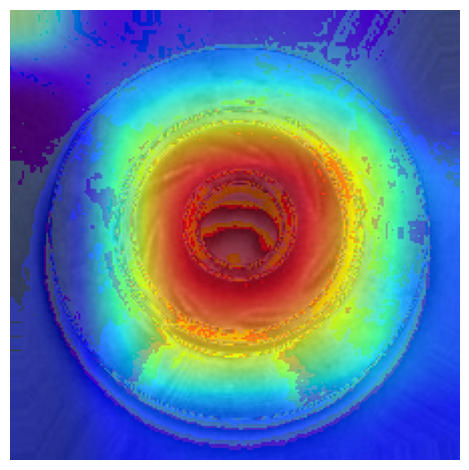

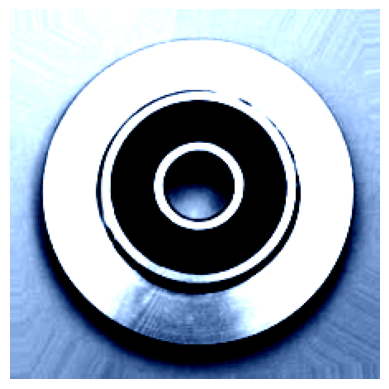

In [111]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

#Kernel Dead 방지 코드
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#CAM을 원본 이미지에 덮어씌우기
result = overlay_mask(to_pil_image(img_norm), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.3)
#CAM 히트맵 출력
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

#원본 이미지 출력
plt.imshow(img_norm.permute(1, 2, 0))  # 이미지를 RGB 형식으로 변환하여 출력
plt.axis('off')
plt.show()

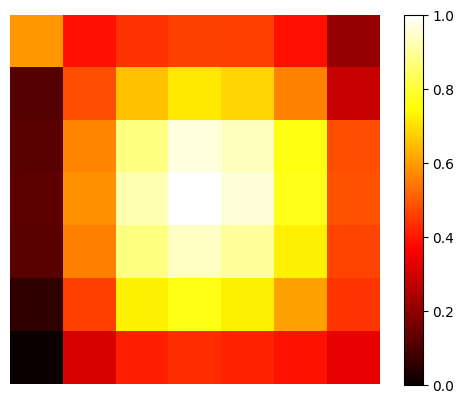

[tensor([[[0.5917, 0.3900, 0.4376, 0.4635, 0.4596, 0.3904, 0.2092],
          [0.1096, 0.4843, 0.6524, 0.7120, 0.6853, 0.5594, 0.2829],
          [0.1178, 0.5627, 0.8717, 0.9623, 0.9326, 0.7640, 0.4840],
          [0.1275, 0.5784, 0.9181, 1.0000, 0.9579, 0.7729, 0.4846],
          [0.1190, 0.5570, 0.8711, 0.9407, 0.8992, 0.7249, 0.4682],
          [0.0552, 0.4608, 0.7241, 0.7692, 0.7244, 0.6085, 0.4452],
          [0.0000, 0.3068, 0.4105, 0.4319, 0.4177, 0.3939, 0.3346]]],
        device='cuda:0')]

In [112]:
#CAM 히트맵과 수치값 확인

plt.imshow(activation_map[0].squeeze(0).cpu().detach().numpy(), cmap='hot', interpolation='nearest')
plt.axis('off')
plt.colorbar()
plt.show()

activation_map

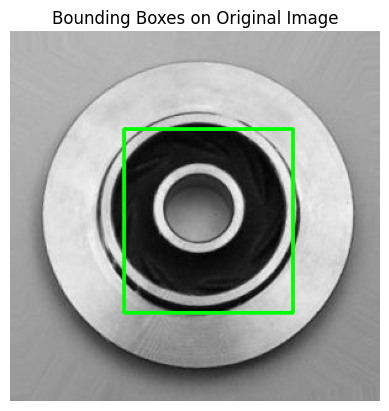

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision.transforms.functional import to_pil_image
from PIL import ImageDraw

# 이미지 파일을 읽어옵니다.
img3 = cv2.imread(selected_image_path2)

# CAM의 히트맵 사이즈를 이미지와 같게 조정
cam_resized = cv2.resize(activation_map[0].squeeze(0).cpu().detach().numpy(), (img3.shape[1], img3.shape[0]))

# 임계값 이상을 가진 영역만 활성화하여 binary_map에 할당
threshold = 0.8  # you may need to adjust this threshold based on your activation map
binary_map = cam_resized > threshold

# binary map의 contour 찾기
contours, _ = cv2.findContours(np.uint8(binary_map), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지에 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color, thickness: 2

# 바운딩 박스가 그려진 이미지 출력
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes on Original Image')
plt.axis('off')
plt.show()

In [160]:
from torchsummary import summary

# model summary
s = summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,